In [25]:
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
def plot_loss(record_file, title, loss):

    f = open(record_file)

    lines = [line.rstrip('\n') for line in f]
    train_loss_list = []
    val_loss_list = []
    for line in lines:
        data = json.loads(line)
        train_loss_list.append(data['loss'])
        val_loss_list.append(data['val_loss'])

    plt.figure()
    plt.plot(train_loss_list, color='g', label='training loss')
    plt.plot(val_loss_list, color='b', label='valid loss')
    plt.xlabel('epoch')
    plt.ylabel(loss)
    plt.title(title)
    plt.legend(loc='upper right')
    plt.savefig(title+'.png')
    #plt.show()


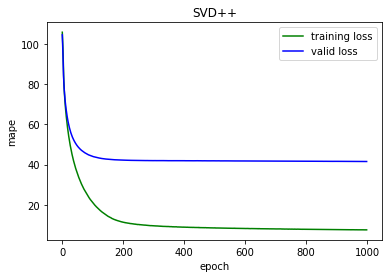

In [78]:
plot_loss('checkpoints/loss_log_mf2_0_mape.json', 'SVD++', 'mape')

In [73]:
import numpy as np
fn_mape = 'old_files/outputs/subm_mf_1_argloss_mape_mape_raw.csv'
fn_mae = 'old_files/outputs/subm_mf_1_argloss_mae_mae_raw.csv'
pred_mape = [float(line.rstrip('\n')) for line in open(fn_mape)]
pred_mae = [float(line.rstrip('\n')) for line in open(fn_mae)]

In [74]:
def gen_final(thre):
    print('thre:', thre)
    final_pred = []
    for p_mae, p_mape in zip(pred_mae, pred_mape):
        if p_mape >= thre:
            final_pred.append(p_mae)
        else:
            final_pred.append(p_mape)
    np.savetxt('old_files/outputs/final_'+str(thre)+'.csv', final_pred, fmt='%1.4f')

In [75]:
for i in np.arange(1, 10, 0.5):
    gen_final(i)

thre: 1.0
thre: 1.5
thre: 2.0
thre: 2.5
thre: 3.0
thre: 3.5
thre: 4.0
thre: 4.5
thre: 5.0
thre: 5.5
thre: 6.0
thre: 6.5
thre: 7.0
thre: 7.5
thre: 8.0
thre: 8.5
thre: 9.0
thre: 9.5
